In [1]:
# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ladda datasetet "Balance Scale Data Set"
dataset = pd.read_csv('balance+scale/balance-scale.data', header=None, names=['Class', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])

# Utforska datasetet
dataset.head()

,Class,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [2]:
# Separera features (X) och målvariabel (y)
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

# Definiera uppdelningar för tränings- och testdata
train_test_splits = [(0.75, 0.25), (2/3, 1/3), (0.5, 0.5)]
k_values = [3, 7, 15]
results = []

In [3]:
# Del 1: Beslutsträd med originaldata och 100 iterationer för varje uppdelning
for train_size, test_size in train_test_splits:
    accuracies = []
    for iteration in range(100):
        # Dela upp datasetet i tränings- och testdata
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=None)
        
        # Skapa och träna beslutsträdet
        tree = DecisionTreeClassifier(random_state=None)
        tree.fit(X_train, y_train)
        
        # Gör prediktioner
        y_pred = tree.predict(X_test)
        
        # Beräkna accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    
    # Beräkna medelvärdet av accuracy över 100 iterationer
    avg_accuracy = np.mean(accuracies)
    
    # Lägg till resultat för visualisering
    results.append(('Decision Tree', train_size, test_size, avg_accuracy))
    
    # Skriv ut medelvärdet av accuracy
    print(f'Decision Tree - Train size = {train_size:.2f}, Test size = {test_size:.2f}, Average Accuracy: {avg_accuracy:.2f}')

Decision Tree - Train size = 0.75, Test size = 0.25, Average Accuracy: 0.78
Decision Tree - Train size = 0.67, Test size = 0.33, Average Accuracy: 0.78
Decision Tree - Train size = 0.50, Test size = 0.50, Average Accuracy: 0.78


In [4]:
# Del 2: Beslutsträd med normaliserat data och 100 iterationer för varje uppdelning
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

for train_size, test_size in train_test_splits:
    accuracies = []
    for iteration in range(100):
        # Dela upp datasetet i tränings- och testdata
        X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size=train_size, test_size=test_size, random_state=None)
        
        # Skapa och träna beslutsträdet
        tree = DecisionTreeClassifier(random_state=None)
        tree.fit(X_train, y_train)
        
        # Gör prediktioner
        y_pred = tree.predict(X_test)
        
        # Beräkna accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    
    # Beräkna medelvärdet av accuracy över 100 iterationer
    avg_accuracy = np.mean(accuracies)
    
    # Lägg till resultat för visualisering
    results.append(('Decision Tree (Normalized)', train_size, test_size, avg_accuracy))
    
    # Skriv ut medelvärdet av accuracy
    print(f'Decision Tree (Normaliserat) - Train size = {train_size:.2f}, Test size = {test_size:.2f}, Average Accuracy: {avg_accuracy:.2f}')

Decision Tree (Normaliserat) - Train size = 0.75, Test size = 0.25, Average Accuracy: 0.77
Decision Tree (Normaliserat) - Train size = 0.67, Test size = 0.33, Average Accuracy: 0.78
Decision Tree (Normaliserat) - Train size = 0.50, Test size = 0.50, Average Accuracy: 0.78


k-NN (k=3) - Train size = 0.75, Test size = 0.25, Accuracy: 0.79


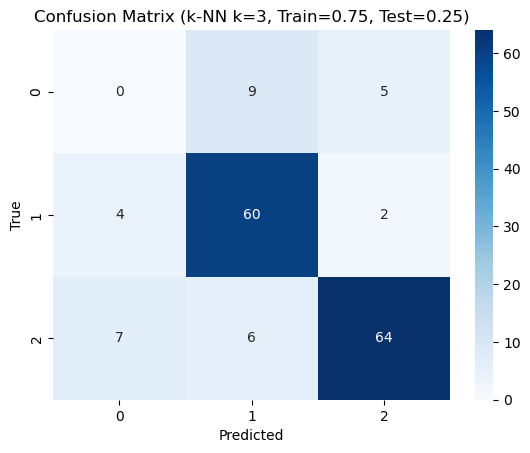

k-NN (k=3) - Train size = 0.67, Test size = 0.33, Accuracy: 0.78


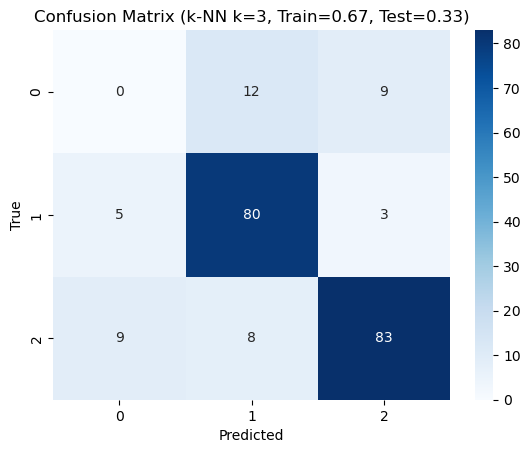

k-NN (k=3) - Train size = 0.50, Test size = 0.50, Accuracy: 0.81


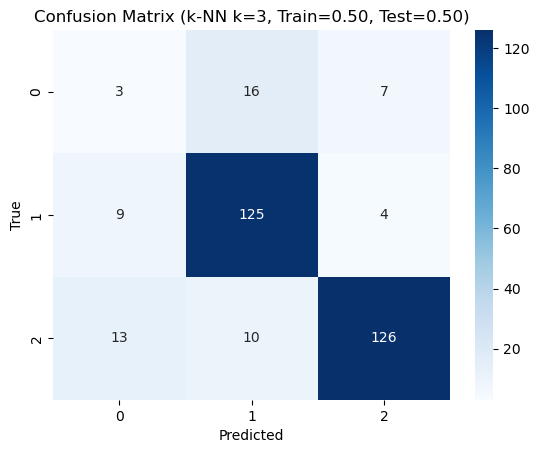

k-NN (k=7) - Train size = 0.75, Test size = 0.25, Accuracy: 0.86


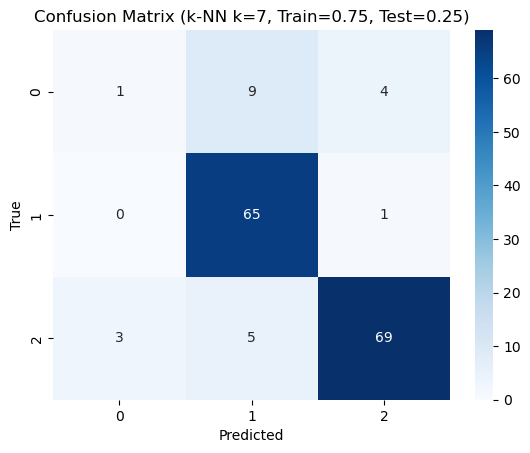

k-NN (k=7) - Train size = 0.67, Test size = 0.33, Accuracy: 0.82


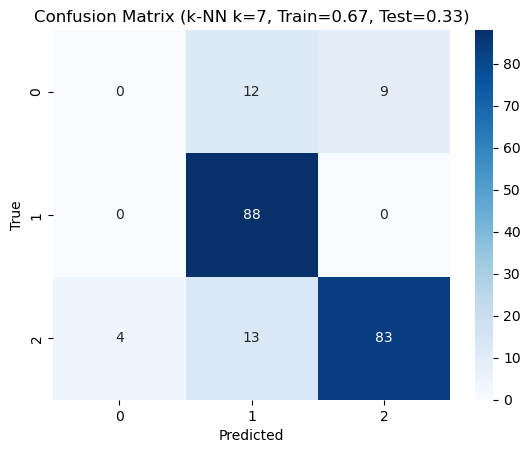

k-NN (k=7) - Train size = 0.50, Test size = 0.50, Accuracy: 0.84


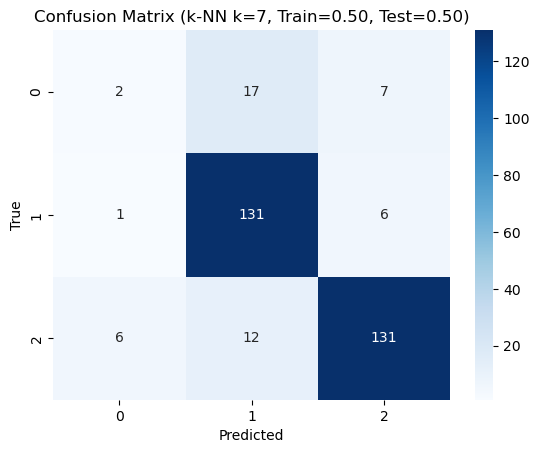

k-NN (k=15) - Train size = 0.75, Test size = 0.25, Accuracy: 0.87


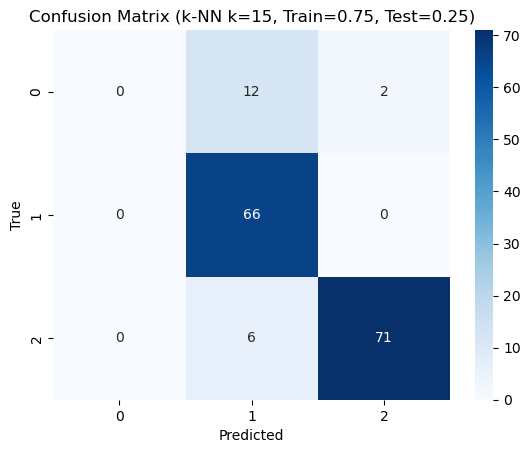

k-NN (k=15) - Train size = 0.67, Test size = 0.33, Accuracy: 0.85


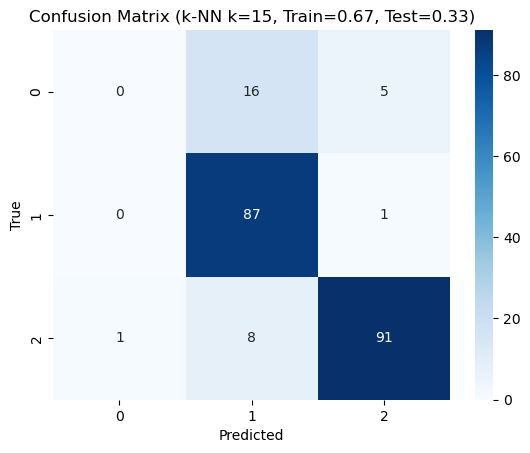

k-NN (k=15) - Train size = 0.50, Test size = 0.50, Accuracy: 0.87


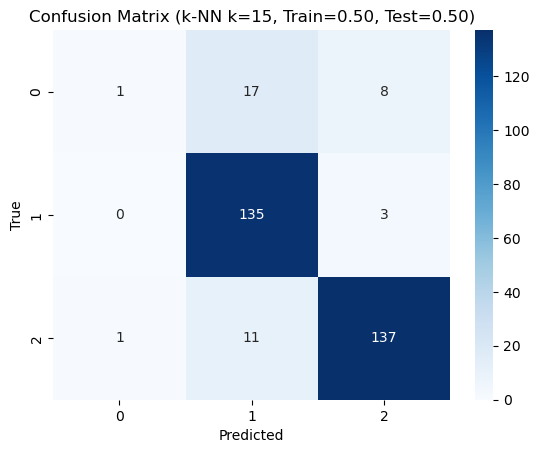

In [5]:
# Del 3: k-NN med originaldata
for k in k_values:
    for train_size, test_size in train_test_splits:
        # Dela upp datasetet i tränings- och testdata
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)
        
        # Skapa och träna k-NN klassificeraren
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Gör prediktioner
        y_pred = knn.predict(X_test)
        
        # Beräkna confusion matrix och accuracy
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        
        # Lägg till resultat för visualisering
        results.append((f'k-NN (k={k})', train_size, test_size, acc, cm))
        
        # Skriv ut confusion matrix och accuracy
        print(f'k-NN (k={k}) - Train size = {train_size:.2f}, Test size = {test_size:.2f}, Accuracy: {acc:.2f}')
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
        plt.title(f'Confusion Matrix (k-NN k={k}, Train={train_size:.2f}, Test={test_size:.2f})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

k-NN (k=3) (Normaliserat) - Train size = 0.75, Test size = 0.25, Accuracy: 0.79


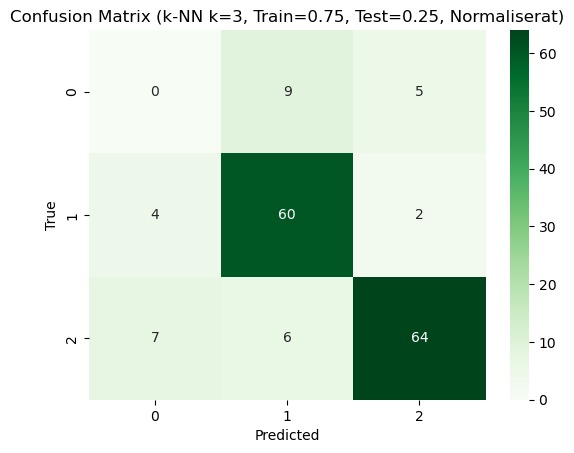

k-NN (k=3) (Normaliserat) - Train size = 0.67, Test size = 0.33, Accuracy: 0.78


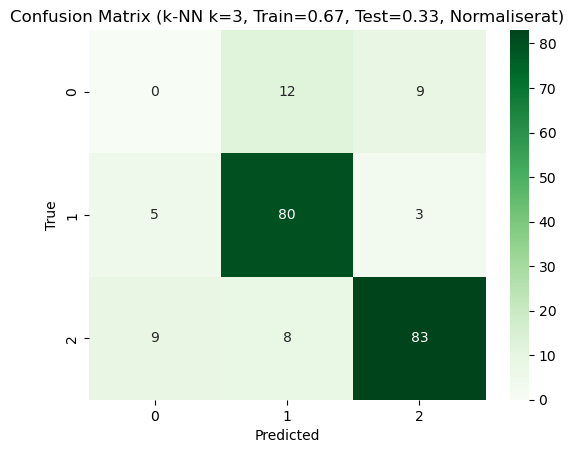

k-NN (k=3) (Normaliserat) - Train size = 0.50, Test size = 0.50, Accuracy: 0.81


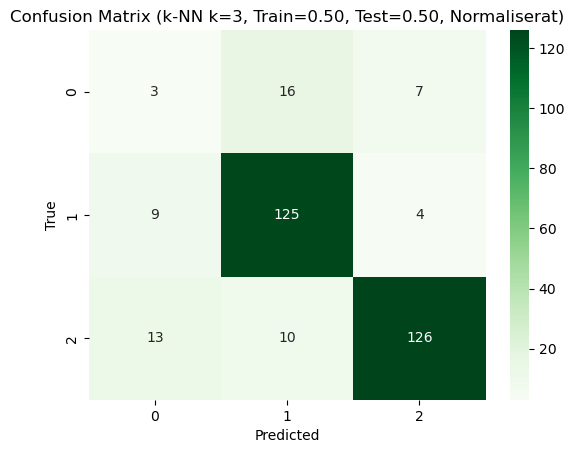

k-NN (k=7) (Normaliserat) - Train size = 0.75, Test size = 0.25, Accuracy: 0.86


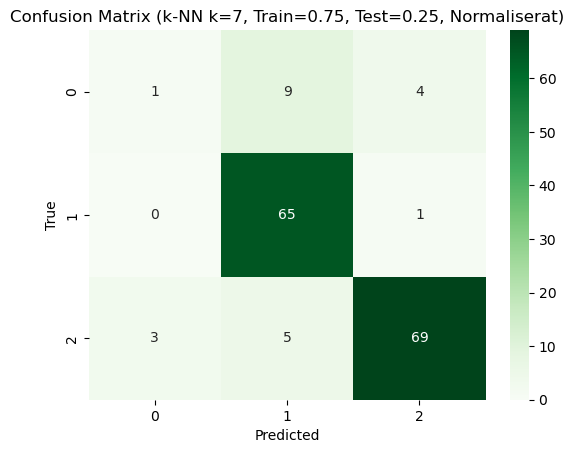

k-NN (k=7) (Normaliserat) - Train size = 0.67, Test size = 0.33, Accuracy: 0.82


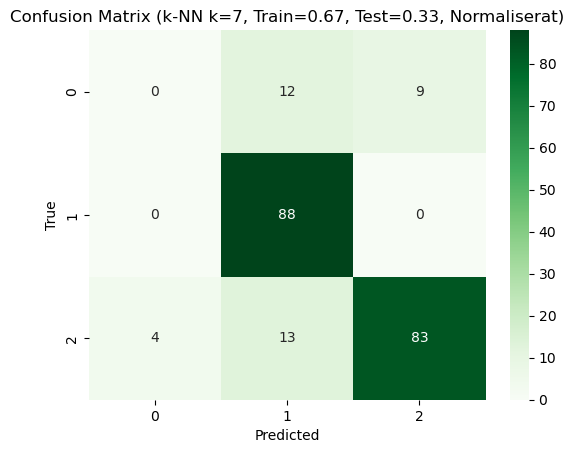

k-NN (k=7) (Normaliserat) - Train size = 0.50, Test size = 0.50, Accuracy: 0.84


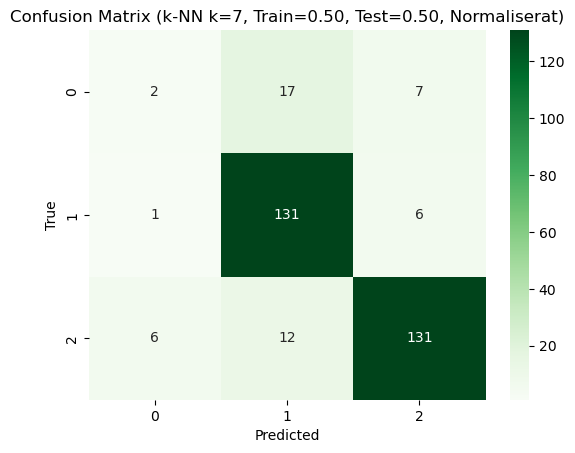

k-NN (k=15) (Normaliserat) - Train size = 0.75, Test size = 0.25, Accuracy: 0.87


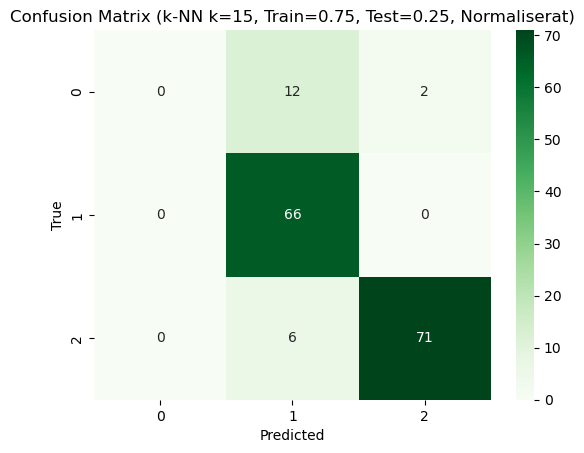

k-NN (k=15) (Normaliserat) - Train size = 0.67, Test size = 0.33, Accuracy: 0.85


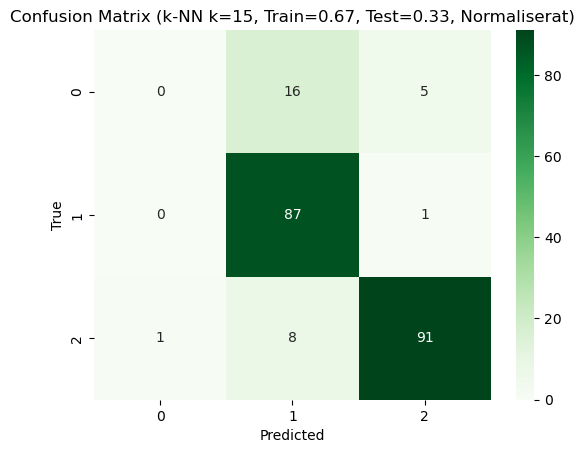

k-NN (k=15) (Normaliserat) - Train size = 0.50, Test size = 0.50, Accuracy: 0.87


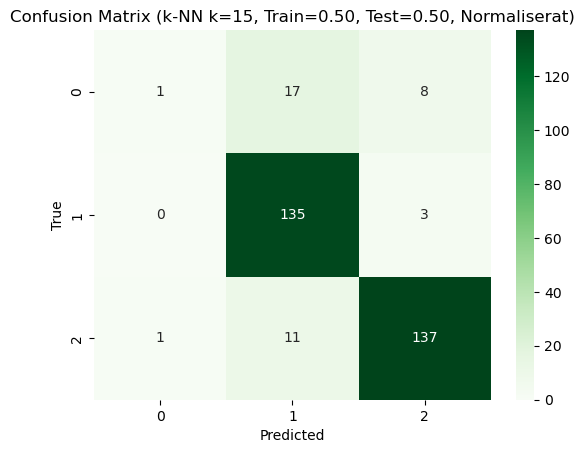

In [6]:
# Del 4: k-NN med normaliserat data
for k in k_values:
    for train_size, test_size in train_test_splits:
        # Dela upp datasetet i tränings- och testdata
        X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size=train_size, test_size=test_size, random_state=42)
        
        # Skapa och träna k-NN klassificeraren
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Gör prediktioner
        y_pred = knn.predict(X_test)
        
        # Beräkna confusion matrix och accuracy
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        
        # Lägg till resultat för visualisering
        results.append((f'k-NN (k={k}) (Normalized)', train_size, test_size, acc, cm))
        
        # Skriv ut confusion matrix och accuracy
        print(f'k-NN (k={k}) (Normaliserat) - Train size = {train_size:.2f}, Test size = {test_size:.2f}, Accuracy: {acc:.2f}')
        sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
        plt.title(f'Confusion Matrix (k-NN k={k}, Train={train_size:.2f}, Test={test_size:.2f}, Normaliserat)')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

In [7]:
# Sammanfattning av bästa resultat
best_results = sorted(results, key=lambda x: x[3], reverse=True)[:3]
print("\nDe tre bästa exekveringarna:")
for model, train_size, test_size, acc, *rest in best_results:
    print(f'Model = {model}, Train size = {train_size:.2f}, Test size = {test_size:.2f}, Accuracy: {acc:.2f}')



De tre bästa exekveringarna:
Model = k-NN (k=15), Train size = 0.75, Test size = 0.25, Accuracy: 0.87
Model = k-NN (k=15) (Normalized), Train size = 0.75, Test size = 0.25, Accuracy: 0.87
Model = k-NN (k=15), Train size = 0.50, Test size = 0.50, Accuracy: 0.87
